In [1]:
%pylab inline
from app.analysis import Quote
foreign = Quote.screen_funds('Equities', 'Foreign', max_expense=.8) + ['VT', 'ACWI', 'ACWV']
reit = Quote.screen_funds('Alternatives', min_assets=1, max_expense=.6)
commodity = Quote.screen_funds('Commodities', min_assets=.6, max_expense=1)
print(len(foreign), len(reit), len(commodity))
quote = Quote(foreign + reit + commodity, 126, 5)
print(f'from {quote.start.date()} to {quote.end.date()} - {len(quote.data.columns)}')

Populating the interactive namespace from numpy and matplotlib
87 12 10
from 2019-02-04 to 2019-08-02 - 109


In [2]:
stats = quote.statistics()
assert stats[stats['len'] < stats['len'].max()].empty
stats = stats[stats['shrp'] > 0]
print(len(stats))
stats.sort_values('mean', ascending=False).head(20)

74


,len,mean,std,shrp,yield,drawdown
Symbols,,,,,,
ASHR,122,0.111686,0.745475,0.139173,10.866856,16.661257
EWL,122,0.107106,0.271639,0.365077,14.055115,3.113807
XLRE,122,0.081520,0.328802,0.223793,11.620059,4.835459
RSX,122,0.081282,0.376230,0.194948,6.663515,6.426207
HEDJ,122,0.081140,0.361405,0.202552,8.735482,6.313765
DBEU,122,0.081039,0.270609,0.270139,9.352618,4.396349
EWA,122,0.077176,0.246150,0.281288,9.270692,3.321207
EFG,122,0.076878,0.276331,0.249490,8.842519,4.537548
HEZU,122,0.076793,0.327097,0.210507,8.576577,5.853812


evicted EWJ 0.877 0.081
evicted DGS 0.892 -0.081
evicted EWC 0.862 0.197
evicted EFAV 0.893 0.193
evicted DWX 0.894 0.137
evicted VNQI 0.766 0.151
evicted EWH 0.800 0.037
evicted VIGI 0.832 0.128
evicted SLV 0.711 -0.139
evicted EWT 0.595 -0.090
evicted ACWV 0.746 0.188
evicted EWZ 0.406 0.056
evicted INDA 0.450 -0.175
evicted REM 0.436 -0.032
evicted RSX 0.510 0.018
evicted USO 0.372 0.001
evicted ASHR 0.634 -0.080
evicted DBEU 0.717 -0.201
evicted IAU 0.231 0.037
retry backlogs ['VEU', 'VEA', 'SGOL', 'DWM', 'IEV', 'VGK', 'ACWI', 'IPAC', 'IXUS', 'FNDF', 'VNQ', 'BBJP', 'USRT', 'SCHF', 'VPL', 'SCHH', 'RWR', 'EFA', 'SPDW', 'EZU', 'VT', 'GLD', 'VXUS', 'SCHC', 'ACWX', 'CWI', 'EPP', 'IYR', 'EWQ', 'IEUR', 'GSIE', 'EFG', 'BBEU', 'IEFA', 'IDEV', 'TLTD', 'DBEF', 'HEFA', 'RODM', 'VWO', 'VYMI', 'FEZ', 'EWU', 'VSS', 'PSLV', 'XLRE', 'EWG', 'RWO', 'HEZU', 'REET', 'SCZ', 'HEDJ'] at 0.905/-0.51 - 0.396
evicted BBJP 0.873 0.069
evicted EPP 0.861 0.065
evicted VWO 0.716 0.001
evicted PSLV 0.772 -0.061
e

,count,mean,std,min,25%,50%,75%,max,shrp,yield,drawdown
Portfolio,122.0,0.077737,0.171745,-0.312560,-0.049384,0.053548,0.179569,0.518927,0.406419,9.929827,1.857266
EWA,122.0,0.077176,0.246150,-0.425682,-0.104956,0.063866,0.236570,0.762436,0.281288,9.270692,3.321207
DBEU,122.0,0.081039,0.270609,-0.684647,-0.097326,0.075307,0.275289,0.563596,0.270139,9.352618,4.396349
XLRE,122.0,0.081520,0.328802,-0.868695,-0.099191,0.130494,0.272999,0.853957,0.223793,11.620059,4.835459
GLD,122.0,0.071208,0.328031,-0.624899,-0.115621,0.070656,0.206482,1.157343,0.192881,9.624073,5.335434


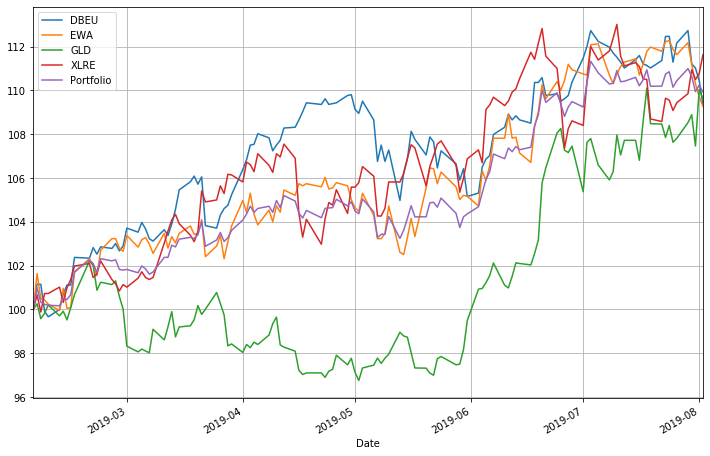

In [3]:
quote.setup_mask(stats.index)
sd = quote.optimize_portfolio()
quote.setup_mask(['DBEU', 'EWA', 'GLD', 'XLRE'])
sd.update(quote.optimize_portfolio())
quote.setup_mask({e for r in sd.values() for e in r})
sd.update(quote.optimize_portfolio())
for e in sd:
    print(e, sd[e])
_, ratio = sd.peekitem()
quote.setup_mask(ratio)
quote.graph(ratio)

In [ ]:
quote.setup_mask(['DBEU', 'EWA', 'GLD', 'XLRE'])
quote.graph({'DBEU': 0.27, 'EWA': 0.28, 'GLD': 0.21, 'XLRE': 0.24})